In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from glob import glob
from crop_weapon import crop_weapon
from jpgize import jpgize
from apply_skin import apply_skin
from resize import resize

all of the images need to have a constant size

pendants and attachments - I need a specific place to place them per each of the guns

skins are going to be appliable over the actual gun

pendants:
    pinata
    dice
    4_leaf
    gold_medal
    disco
    
attachments:
    thermal_scope
    acog
    flamethrower
    grenade_launcher
    green_laser
    red_laser
    holo_scope
    suppressor
    red_dot
    
skins: 
    1
    2
    3
    4
    5
    6
    7
    8
    9 

total: 5 pendants * 9 attachments * 9 skins = 405 unique combinations

all the gun have to be extracted from the png and then the attachements, skins etc added and the whole thing has to be put in the center of the png

for some attachements there are going to be additional things to put in the up-left corner

and the name of the gun is in the bottom-left corner

In [2]:
pinata_spaz = cv2.imread('./data/Spaz12/PInata KC.png', cv2.IMREAD_UNCHANGED)

In [3]:
pinata_deagle = cv2.imread('./data/Deagle/PInata KC.png', cv2.IMREAD_UNCHANGED)

In [4]:
np.testing.assert_equal(pinata_spaz, pinata_deagle)

In [5]:
for i in os.listdir('skins'):
    assert len(os.listdir('skins/' + i)) == 9

---

In [6]:
ak47 = cv2.imread('./weapons/Ak47.png', cv2.IMREAD_UNCHANGED)

In [7]:
ak47[14, 23]

array([ 66,  66,  66, 255], dtype=uint8)

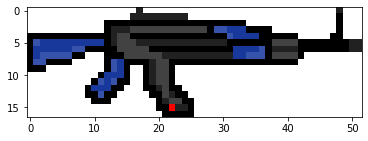

In [8]:
_ak = ak47.copy()
_ak[15, 22] = [255, 0, 0, 255]
plt.imshow(_ak)

In [9]:
skin = cv2.imread('./skins/Ak47/Skin 1.png', cv2.IMREAD_UNCHANGED)

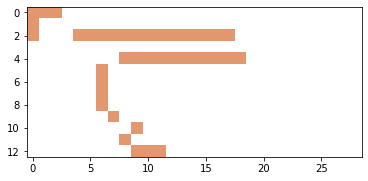

In [10]:
plt.imshow(skin)

In [11]:
ak_skins = [cv2.imread(i, cv2.IMREAD_UNCHANGED) 
            for i in glob('skins/Ak47/*.png')]

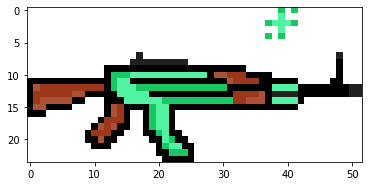

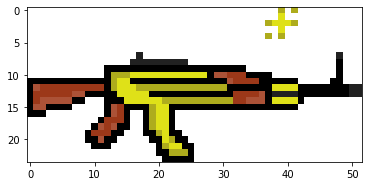

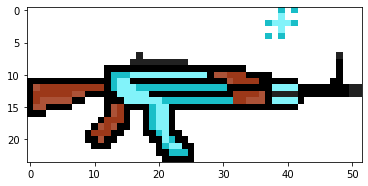

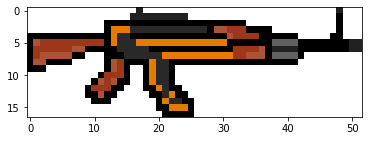

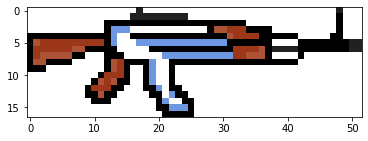

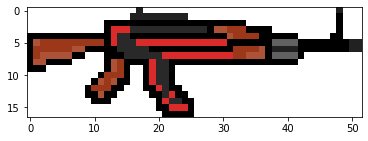

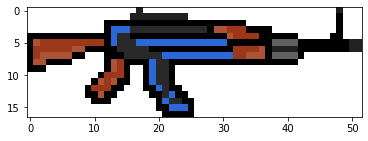

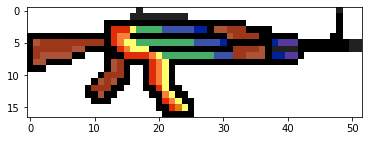

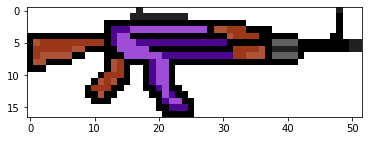

In [13]:
for skin in ak_skins:
    ak47 = cv2.imread('./weapons/Ak47.png', cv2.IMREAD_UNCHANGED)
    skin, ak47 = resize(skin, ak47, 'ak47')
    out = apply_skin(ak47, skin)
    out = cv2.cvtColor(out, cv2.COLOR_BGRA2RGBA)
    plt.imshow(out)
    plt.show()